## Importing necesssary libraries

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS/DataMining/Project/fetal_health.csv')

In [ ]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Data Preproprocessing

In [ ]:
df.info() # we can see that all the columns are numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.isna().sum() # The entire dataset is free of null values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Data Exploration & Visualization

Checking counts of fetal health heart beat accelerations

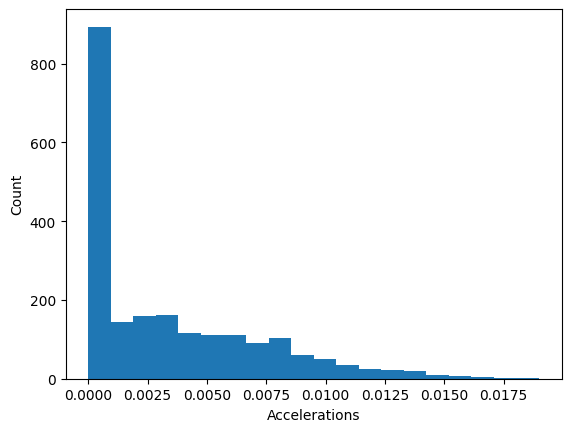

In [ ]:
plt.hist(df['accelerations'], bins=20)
plt.xlabel('Accelerations')
plt.ylabel('Count')
plt.show()

checking for outliers

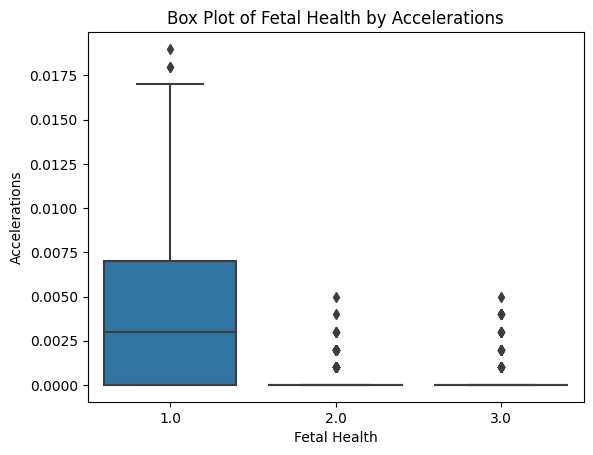

In [ ]:
sns.boxplot(x='fetal_health', y='accelerations', data=df)
plt.title('Box Plot of Fetal Health by Accelerations')
plt.xlabel('Fetal Health')
plt.ylabel('Accelerations')
plt.show()

Pairplots help us to understand the correlation and distribution between different variables in a dataset

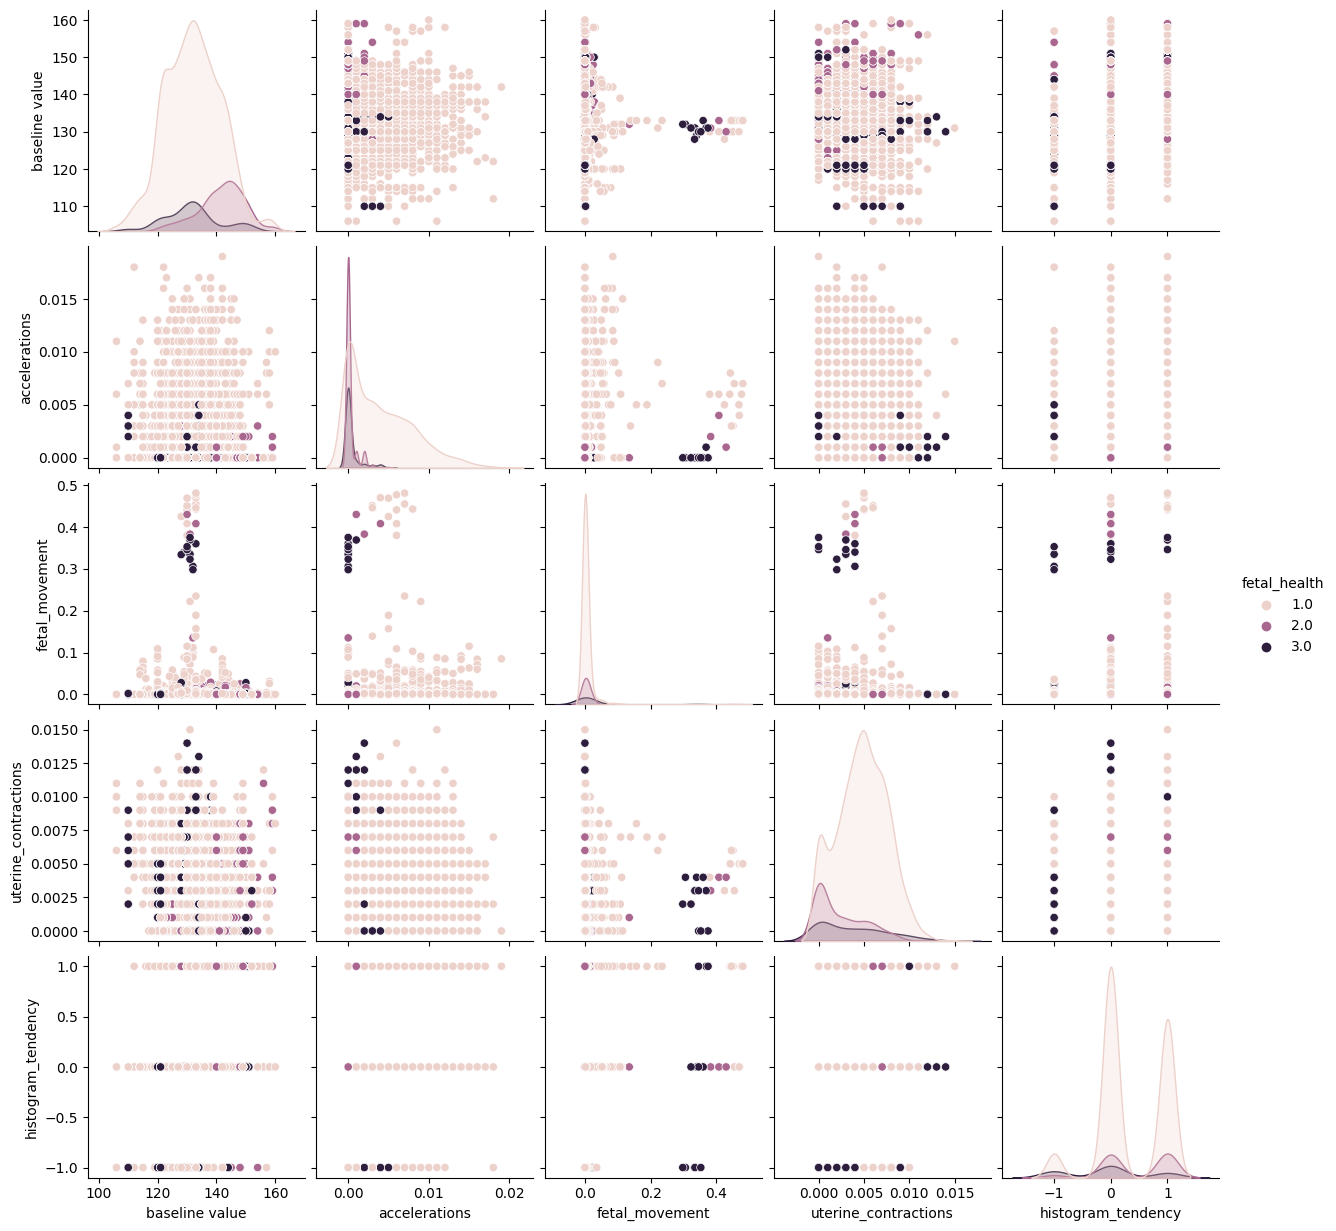

In [ ]:
selected_features = ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'histogram_tendency','fetal_health']
sns.pairplot(df[selected_features], hue='fetal_health')
plt.show()

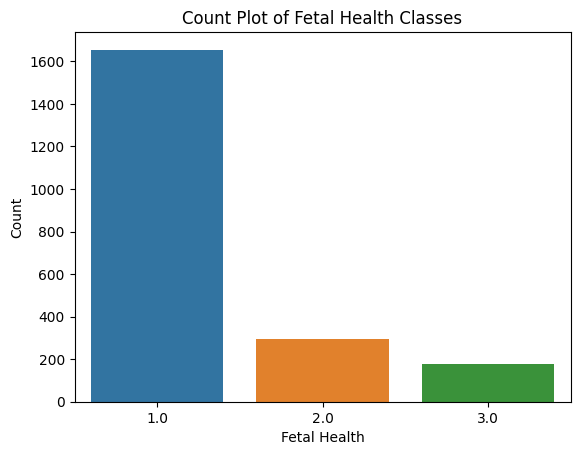

In [ ]:
sns.countplot(x='fetal_health', data=df)
plt.title('Count Plot of Fetal Health Classes')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

Basic distribution check and correlation check

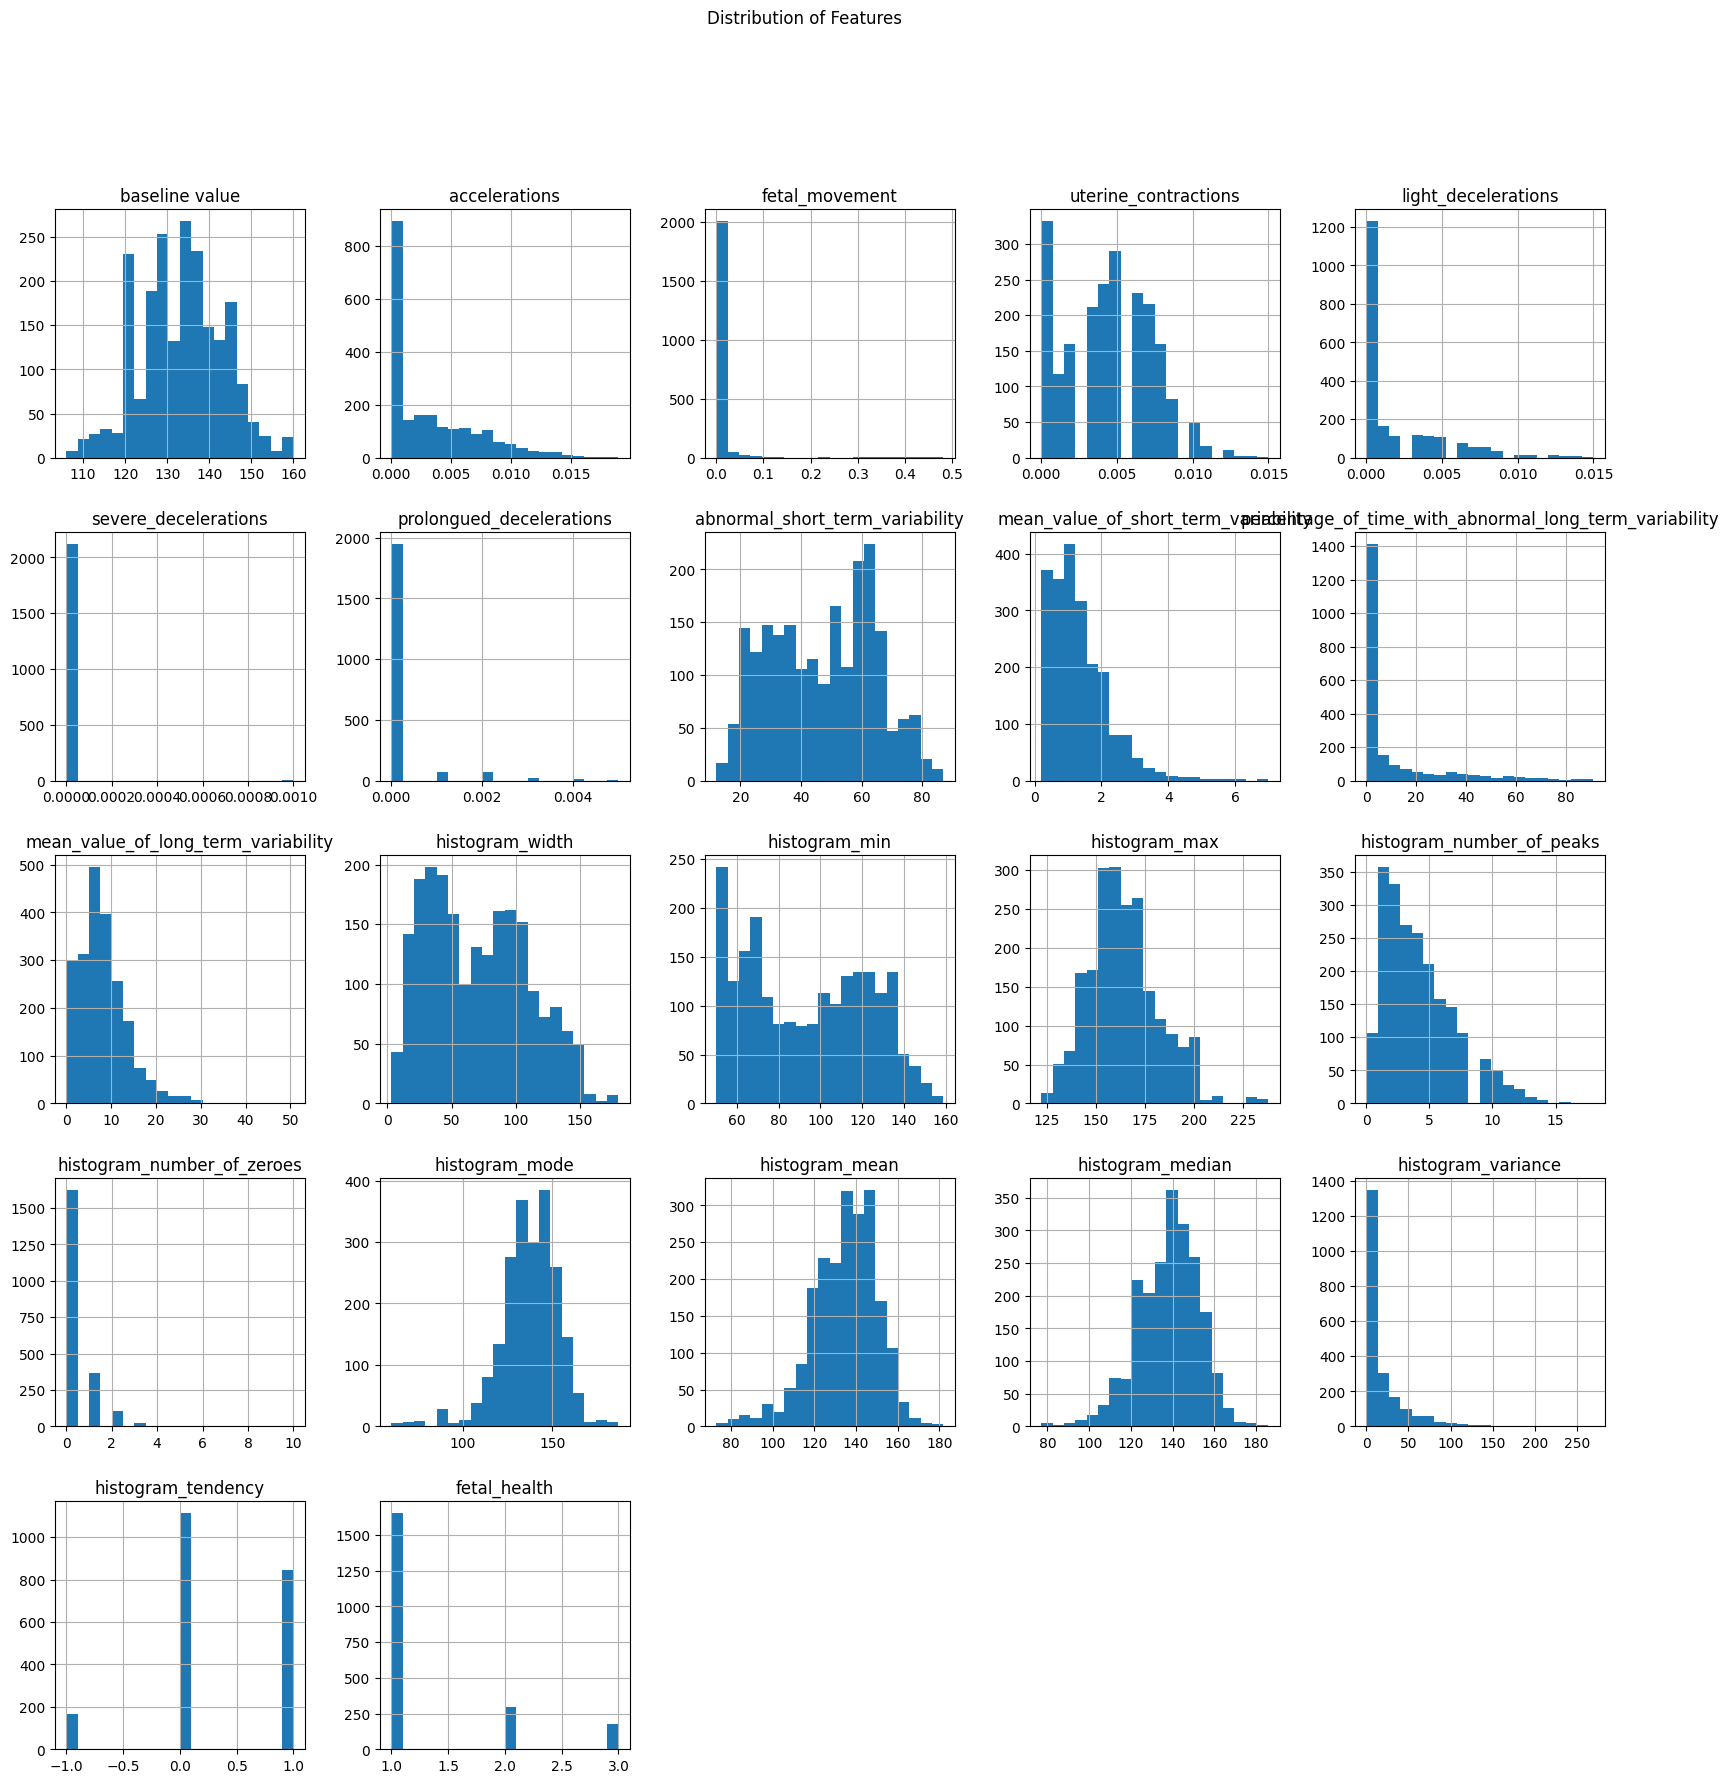

In [ ]:
df.hist(bins=20, figsize=(20,20))
plt.suptitle('Distribution of Features')
plt.show()

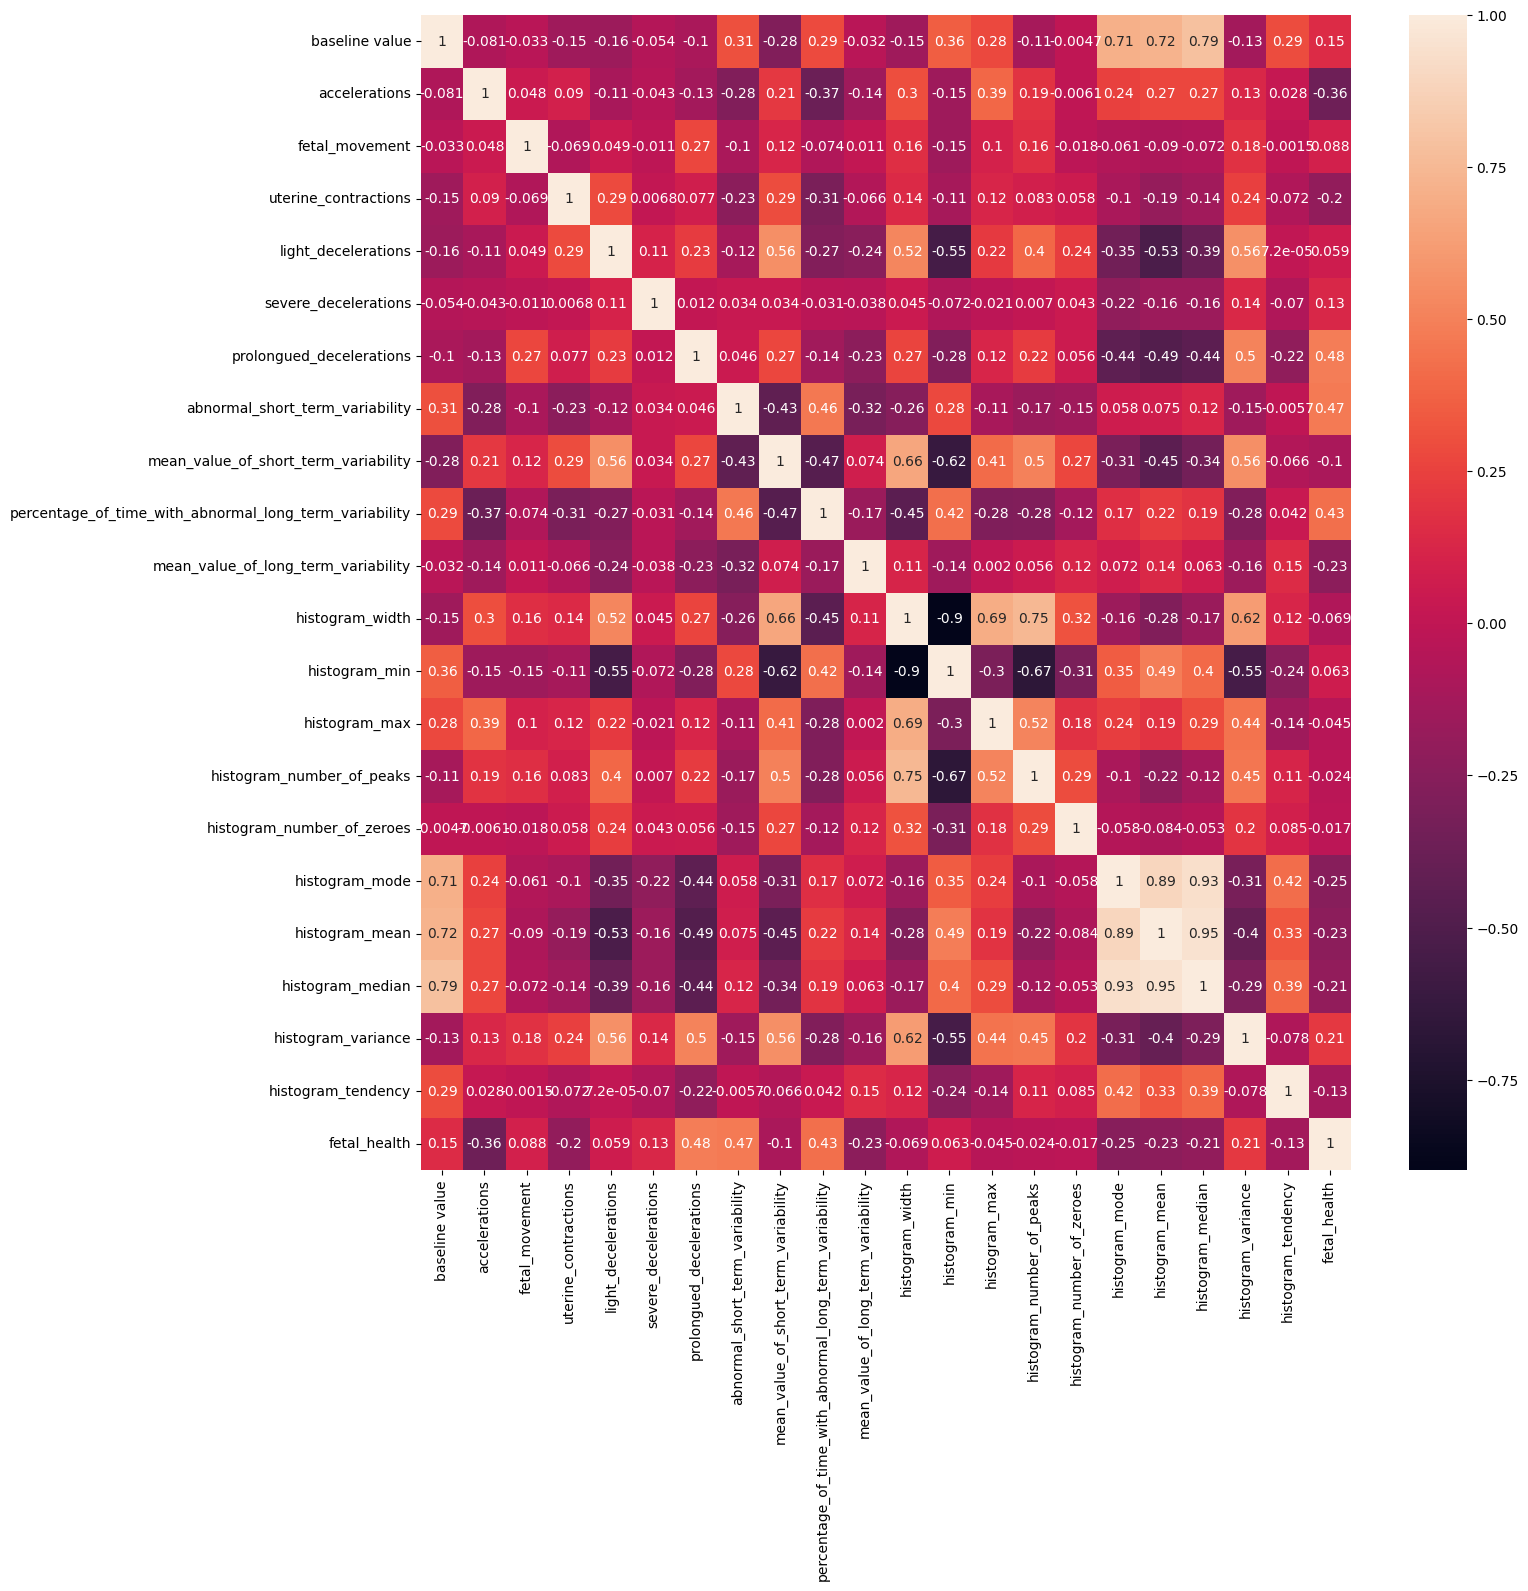

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True)
corr_matrix=df.corr()

Checking for highly correlated values

In [ ]:
#Method-1 using unstack function, we display the correlation pairs
corr_pairs=corr_matrix.unstack()
sorted_pairs=corr_pairs.sort_values(ascending=False)
sorted_pairs=sorted_pairs[sorted_pairs!=1]
top_pairs=sorted_pairs[sorted_pairs>0.9]
print(top_pairs)

histogram_median  histogram_mean      0.948251
histogram_mean    histogram_median    0.948251
histogram_mode    histogram_median    0.933399
histogram_median  histogram_mode      0.933399
dtype: float64


In [ ]:
#Method-2 using a simple for loop to display the highly correlated pairs, ones above 0.9
vars=[]
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j]>0.9:
            a=corr_matrix.columns[i]
            b=corr_matrix.columns[j]
            vars.append(a)
            vars.append(b)
set(vars)

{'histogram_mean', 'histogram_median', 'histogram_mode'}

As there are so many features, we perform principal component analysis.

## Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
pca = PCA(n_components=2)

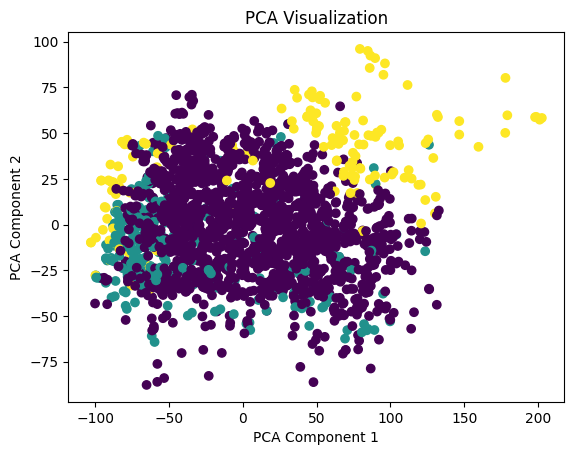

In [ ]:
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

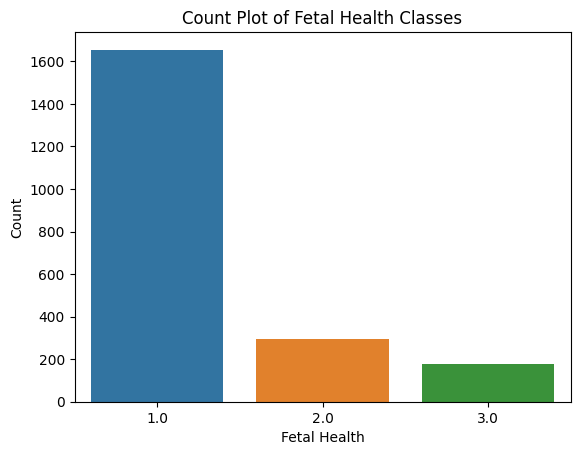

In [ ]:
sns.countplot(x='fetal_health', data=df)
plt.title('Count Plot of Fetal Health Classes')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

In [ ]:
health=df['fetal_health'].value_counts()
normal=health[1]
suspect=health[2]
pathological=health[3]

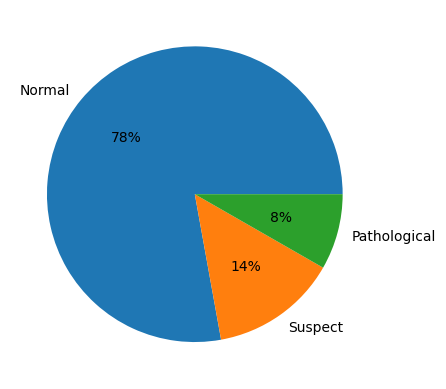

In [ ]:
plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"],autopct="%1.0f%%");

## Model Analysis

In [ ]:
X=df.drop(['fetal_health'],axis=1) # Predictors in X
y=df['fetal_health'] # Target in y

In [ ]:
# Scaling the data to bring every feature in the same range
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
#splitting the data with training data 75% and testing data as 25%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1594, 21)
(532, 21)
(1594,)
(532,)


### KNN Classifier

#### Without Parameter tuning

In [ ]:
#Finding best k with highest accuracy
finalk=0
ac_final=0
for k in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    ac=accuracy_score(y_test, y_pred)
    if ac > ac_final:
        finalk=k
        ac_final=ac
print('Best k:',finalk)
print('Best Accuracy:',ac_final)

Best k: 5
Best Accuracy: 0.9022556390977443


In [ ]:
# Fitting the data with KNN model with best K as 5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(X_test)

In [ ]:
# Finding all the evaluation metrics before hyperparameter tuning:
acc_knn=accuracy_score(y_test, y_pred_knn)
prec_knn=precision_score(y_test, y_pred_knn, average='macro')
rec_knn=recall_score(y_test, y_pred_knn, average='macro')
f1_knn=f1_score(y_test, y_pred_knn, average='macro')
auc_knn=roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovo')
knn_mse=mean_squared_error(y_test, y_pred_knn)
knn_rmse=sqrt(knn_mse)
knn_mae=mean_absolute_error(y_test, y_pred_knn)
knn_ae=knn_mae*len(y_test)
knn_r2=r2_score(y_test, y_pred_knn)

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
accuracy_score(y_test, y_pred_knn)

[[400   7   3]
 [ 27  43   2]
 [  5   8  37]]


0.9022556390977443

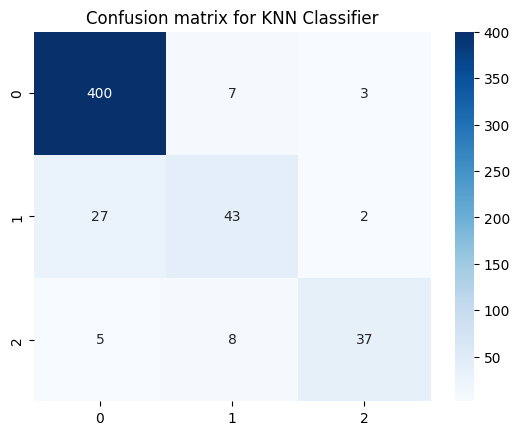

In [ ]:
# Heatmap before hyperparamter tuning:
knn_cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for KNN Classifier')
plt.show()

In [ ]:
print("KNN model evaluation metrics before Parameter tuning:")
print("Accuracy:",acc_knn)
print("Precision:",prec_knn)
print("Recall:",rec_knn)
print("F1 score:",f1_knn)
print("ROC AUC score:",auc_knn)
print("MSE:",knn_mse)
print("RMSE:",knn_rmse)
print("MAE:",knn_mae)
print("AE:",knn_ae)
print("R2:",knn_r2)

KNN model evaluation metrics before Parameter tuning:
Accuracy: 0.9022556390977443
Precision: 0.8494192057410448
Recall: 0.7709439927732612
F1 score: 0.8053350174903412
ROC AUC score: 0.938761517615176
MSE: 0.14285714285714285
RMSE: 0.3779644730092272
MAE: 0.11278195488721804
AE: 60.0
R2: 0.6487838776928423


In [ ]:
print('Classification Report of KNN classifer before parameter tuning:')
print(classification_report(y_test, y_pred_knn))

Classification Report of KNN classifer before parameter tuning:
              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       410
         2.0       0.74      0.60      0.66        72
         3.0       0.88      0.74      0.80        50

    accuracy                           0.90       532
   macro avg       0.85      0.77      0.81       532
weighted avg       0.90      0.90      0.90       532



#### Parameter tuning for KNN classifier

In [ ]:
 #using Grid search CV for parameter
param_grid={'n_neighbors':[3, 5, 7, 9, 11]}
knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [ ]:
print("Best hyperparameters:",grid_search.best_params_)
print("Best accuracy:",grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 5}
Best accuracy: 0.8996214585674573


In [ ]:
knn=KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
accuracy=knn.score(X_test, y_test)
print("Accuracy on test set: ",accuracy)

Accuracy on test set:  0.9022556390977443


In [ ]:
y_train_pred=grid_search.predict(X_train)
y_test_pred=grid_search.predict(X_test)
train_error_knn=mean_squared_error(y_train, y_train_pred)
test_error_knn=mean_squared_error(y_test, y_test_pred)

In [ ]:
print("Training error for KNN classifier:",train_error_knn)
print("Testing error for KNN classifier:",test_error_knn)

Training error for KNN classifier: 0.08971141781681305
Testing error for KNN classifier: 0.14285714285714285


### Decision Tree Classifier

#### Without Parameter tuning

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',random_state =0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dt=dt.predict(X_test)

In [ ]:
# Performing evaluation metrics beofre parameter tuning
acc_dt=accuracy_score(y_test, y_pred_dt)
prec_dt=precision_score(y_test, y_pred_dt, average='macro')
rec_dt=recall_score(y_test, y_pred_dt, average='macro')
f1_dt=f1_score(y_test, y_pred_dt, average='macro')
auc_dt=roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovo')
dt_mse=mean_squared_error(y_test, y_pred_dt)
dt_rmse=sqrt(dt_mse)
dt_mae=mean_absolute_error(y_test, y_pred_dt)
dt_ae=dt_mae*len(y_test)
dt_r2=r2_score(y_test, y_pred_dt)

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
accuracy_score(y_test, y_pred_dt)

[[401   8   1]
 [ 16  52   4]
 [  3   5  42]]


0.9304511278195489

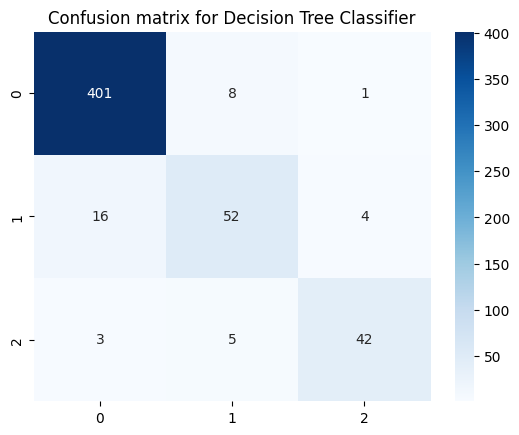

In [ ]:
dt_cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Decision Tree Classifier')
plt.show()

In [ ]:
print("Decision Tree model evaluation metrics before parameter tuning:")
print("Accuracy:",acc_dt)
print("Precision:",prec_dt)
print("Recall:",rec_dt)
print("F1 score:",f1_dt)
print("ROC AUC score:",auc_dt)
print("MSE:",dt_mse)
print("RMSE:",dt_rmse)
print("MAE:",dt_mae)
print("AE:",dt_ae)
print("R2:",dt_r2)

Decision Tree model evaluation metrics before parameter tuning:
Accuracy: 0.9304511278195489
Precision: 0.8827929753461667
Recall: 0.8467570009033424
F1 score: 0.8637895097585012
ROC AUC score: 0.8849539295392953
MSE: 0.09210526315789473
RMSE: 0.30348848933344197
MAE: 0.07706766917293233
AE: 41.0
R2: 0.7735580264072273


In [ ]:
print('Classification report for Decision Tree classifier:')
print(classification_report(y_test, y_pred_dt))

Classification report for Decision Tree classifier:
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       410
         2.0       0.80      0.72      0.76        72
         3.0       0.89      0.84      0.87        50

    accuracy                           0.93       532
   macro avg       0.88      0.85      0.86       532
weighted avg       0.93      0.93      0.93       532



#### Parameter tuning for Decision tree classifier

In [ ]:
dt_params={'criterion': ['gini', 'entropy'], 
             'max_depth': [3, 5, 7, 9], 
             'min_samples_split': [2, 5, 10], 
             'min_samples_leaf': [1, 2, 4]}
dt=DecisionTreeClassifier(random_state=42)
dt_gs=GridSearchCV(dt, dt_params, cv=5)
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
dt_pred=dt_gs.predict(X_test)

In [ ]:
print("Decision Tree:Best hyperparameters:",dt_gs.best_params_)
print("Accuracy score:",accuracy_score(y_test,dt_pred))

Decision Tree:Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy score: 0.9285714285714286


In [ ]:
acc_dt=accuracy_score(y_test, dt_pred)
prec_dt=precision_score(y_test, dt_pred, average='macro')
rec_dt=recall_score(y_test, dt_pred, average='macro')
f1_dt=f1_score(y_test, dt_pred, average='macro')
auc_dt=roc_auc_score(y_test, dt_gs.predict_proba(X_test), multi_class='ovo')
dt_mse=mean_squared_error(y_test, dt_pred)
dt_rmse=sqrt(dt_mse)
dt_mae=mean_absolute_error(y_test, dt_pred)
dt_ae=dt_mae*len(y_test)
dt_r2=r2_score(y_test, dt_pred)

In [ ]:
print("Decision Tree model evaluation metrics after hyperparameter tuning:")
print("Accuracy:",acc_dt)
print("Precision:",prec_dt)
print("Recall:",rec_dt)
print("F1 score:",f1_dt)
print("ROC AUC score:",auc_dt)
print("MSE:",dt_mse)
print("RMSE:",dt_rmse)
print("MAE:",dt_mae)
print("AE:",dt_ae)
print("R2:",dt_r2)

Decision Tree model evaluation metrics after hyperparameter tuning:
Accuracy: 0.9285714285714286
Precision: 0.9164097933788983
Recall: 0.8344941282746161
F1 score: 0.8705632737613233
ROC AUC score: 0.9353332204155375
MSE: 0.11090225563909774
RMSE: 0.33301990276723364
MAE: 0.08458646616541353
AE: 45.0
R2: 0.7273453787352329


In [ ]:
y_train_pred=dt_gs.predict(X_train)
y_test_pred=dt_gs.predict(X_test)
train_error_dt=mean_squared_error(y_train, y_train_pred)
test_error_dt=mean_squared_error(y_test, y_test_pred)

In [ ]:
print("Training error for Decision Tree classifier:",train_error_dt)
print("Testing error for Decision Tree classifier:",test_error_dt)

Training error for Decision Tree classifier: 0.04328732747804266
Testing error for Decision Tree classifier: 0.11090225563909774


### Random Forest Classifier

#### Without parameter tuning

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='macro')
rec_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovo')
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_ae = rf_mae * len(y_test)
rf_r2 = r2_score(y_test, y_pred_rf)

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_score(y_test, y_pred_rf)

[[403   6   1]
 [ 17  53   2]
 [  2   4  44]]


0.9398496240601504

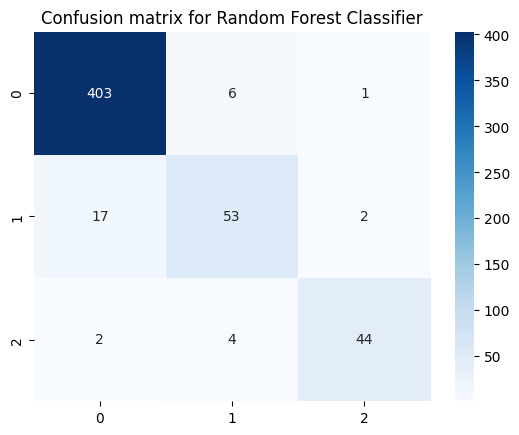

In [ ]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier')
plt.show()

In [ ]:
print("Random Forest model evaluation metrics before paramter tuning:")
print("Accuracy:",acc_rf)
print("Precision:",prec_rf)
print("Recall:",rec_rf)
print("F1 score:",f1_rf)
print("ROC AUC score:",auc_rf)
print("MSE:",rf_mse)
print("RMSE:",rf_rmse)
print("MAE:",rf_mae)
print("AE:",rf_ae)
print("R2:",rf_r2)

Random Forest model evaluation metrics before paramter tuning:
Accuracy: 0.9398496240601504
Precision: 0.9108054524511114
Recall: 0.8663459801264679
F1 score: 0.887050560010182
ROC AUC score: 0.9598541102077688
MSE: 0.07706766917293233
RMSE: 0.27761064311897754
MAE: 0.06578947368421052
AE: 35.0
R2: 0.8105281445448228


In [ ]:
print('Classification Report on Random Forest Classifier:')
print(classification_report(y_test, y_pred_rf))

Classification Report on Random Forest Classifier:
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       410
         2.0       0.84      0.74      0.79        72
         3.0       0.94      0.88      0.91        50

    accuracy                           0.94       532
   macro avg       0.91      0.87      0.89       532
weighted avg       0.94      0.94      0.94       532



#### Parameter tuning for Random Forest Classifier 

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=0),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print("Best parameters:",grid_search.best_params_)
print("Best accuracy score:",grid_search.best_score_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best accuracy score: 0.9416435007196231


In [ ]:
y_pred_rf=grid_search.predict(X_test)

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='macro')
rec_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovo')
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_ae = rf_mae * len(y_test)
rf_r2 = r2_score(y_test, y_pred_rf)

In [ ]:
print("Random Forest model evaluation metrics:")
print("Accuracy:",acc_rf)
print("Precision:",prec_rf)
print("Recall:",rec_rf)
print("F1 score:",f1_rf)
print("ROC AUC score:",auc_rf)
print("MSE:",rf_mse)
print("RMSE:",rf_rmse)
print("MAE:",rf_mae)
print("AE:",rf_ae)
print("R2:",rf_r2)

Random Forest model evaluation metrics:
Accuracy: 0.9454887218045113
Precision: 0.9265726866124222
Recall: 0.8843089430894309
F1 score: 0.904162339815279
ROC AUC score: 0.9598541102077688
MSE: 0.06015037593984962
RMSE: 0.24525573579398632
MAE: 0.05639097744360902
AE: 30.0
R2: 0.8521195274496178


In [ ]:
y_train_pred=grid_search.predict(X_train)
y_test_pred=grid_search.predict(X_test)
train_error_rf=mean_squared_error(y_train, y_train_pred)
test_error_rf=mean_squared_error(y_test, y_test_pred)

In [ ]:
print("Training error for Random Forest Classifier:",train_error_rf)
print("Testing error for Random Forest Classifier:",test_error_rf)

Training error for Random Forest Classifier: 0.0012547051442910915
Testing error for Random Forest Classifier: 0.06015037593984962


### Logistic Regression

#### Without Parameter tuning

In [ ]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='macro')
rec_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovo')
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_ae = lr_mae * len(y_test)
lr_r2 = r2_score(y_test, y_pred_lr)

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
accuracy_score(y_test, y_pred_lr)

[[389  18   3]
 [ 23  47   2]
 [  3   6  41]]


0.8966165413533834

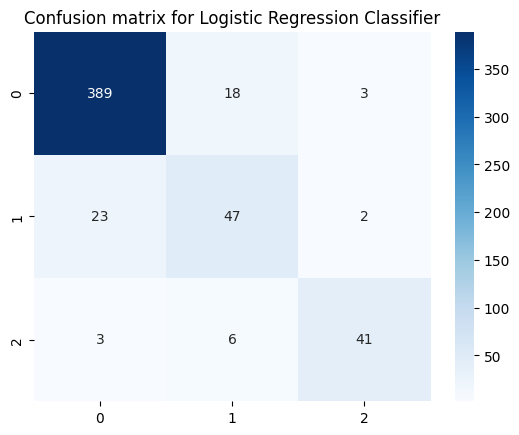

In [ ]:
lr_cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(lr_cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Logistic Regression Classifier')
plt.show()

In [ ]:
print("Logistic Regression model evaluation metrics before parameter tuning:")
print("Accuracy:",acc_lr)
print("Precision:",prec_lr)
print("Recall:",rec_lr)
print("F1 score: ",f1_lr)
print("ROC AUC score:",auc_lr)
print("MSE:",lr_mse)
print("RMSE:",lr_rmse)
print("MAE:",lr_mae)
print("AE:",lr_ae)
print("R2:",lr_r2)

Logistic Regression model evaluation metrics before parameter tuning:
Accuracy: 0.8966165413533834
Precision: 0.8302085254674546
Recall: 0.8071860885275518
F1 score:  0.8181798756798756
ROC AUC score: 0.9529155374887083
MSE: 0.13721804511278196
RMSE: 0.3704295413608126
MAE: 0.11466165413533834
AE: 61.0
R2: 0.6626476719944407


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       410
         2.0       0.66      0.65      0.66        72
         3.0       0.89      0.82      0.85        50

    accuracy                           0.90       532
   macro avg       0.83      0.81      0.82       532
weighted avg       0.90      0.90      0.90       532



#### Parameter tuning for Logistic Regression

In [ ]:
lr_params = {'penalty': ['l1', 'l2'], 
             'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'solver': ['liblinear']}
lr=LogisticRegression(random_state=42)
lr_gs=GridSearchCV(lr, lr_params, cv=5)
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [ ]:
lr_pred = lr_gs.predict(X_test)

In [ ]:
print("Logistic Regression: Best hyperparameters: ", lr_gs.best_params_)
print("Accuracy score: ", accuracy_score(y_test, lr_pred))

Logistic Regression: Best hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score:  0.8872180451127819


In [ ]:
acc_lr = accuracy_score(y_test, lr_pred)
prec_lr = precision_score(y_test, lr_pred, average='macro')
rec_lr = recall_score(y_test, lr_pred, average='macro')
f1_lr = f1_score(y_test, lr_pred, average='macro')
auc_lr = roc_auc_score(y_test, lr_gs.predict_proba(X_test), multi_class='ovo')
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_ae = lr_mae * len(y_test)
lr_r2 = r2_score(y_test, lr_pred)

In [ ]:
print("Logistic Regression model evaluation metrics after parameter tuning:")
print("Accuracy:",acc_lr)
print("Precision:",prec_lr)
print("Recall:",rec_lr)
print("F1 score:",f1_lr)
print("ROC AUC score:",auc_lr)
print("MSE:",lr_mse)
print("RMSE:",lr_rmse)
print("MAE:",lr_mae)
print("AE:",lr_ae)
print("R2:",lr_r2)

Logistic Regression model evaluation metrics after parameter tuning:
Accuracy: 0.8872180451127819
Precision: 0.8207074844312907
Recall: 0.7585862691960253
F1 score: 0.786379135015324
ROC AUC score: 0.9363166214995483
MSE: 0.16353383458646617
RMSE: 0.4043931683231879
MAE: 0.12969924812030076
AE: 69.0
R2: 0.5979499652536484


In [ ]:
y_train_pred=lr_gs.predict(X_train)
y_test_pred=lr_gs.predict(X_test)
train_error_lr=mean_squared_error(y_train, y_train_pred)
test_error_lr=mean_squared_error(y_test, y_test_pred)

In [ ]:
print("Training error for Logistic Regression:",train_error_lr)
print("Testing error for Logistic Regression:",test_error_lr)

Training error for Logistic Regression: 0.13927227101631118
Testing error for Logistic Regression: 0.16353383458646617


### Naive Bayes Classifier

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb, average='macro')
rec_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')
auc_nb = roc_auc_score(y_test, nb.predict_proba(X_test), multi_class='ovo')
nb_mse = mean_squared_error(y_test, y_pred_nb)
nb_rmse = sqrt(nb_mse)
nb_mae = mean_absolute_error(y_test, y_pred_nb)
nb_ae = nb_mae * len(y_test)
nb_r2 = r2_score(y_test, y_pred_nb)

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)
accuracy_score(y_test, y_pred_nb)

[[279 113  18]
 [  1  68   3]
 [  0  17  33]]


0.7142857142857143

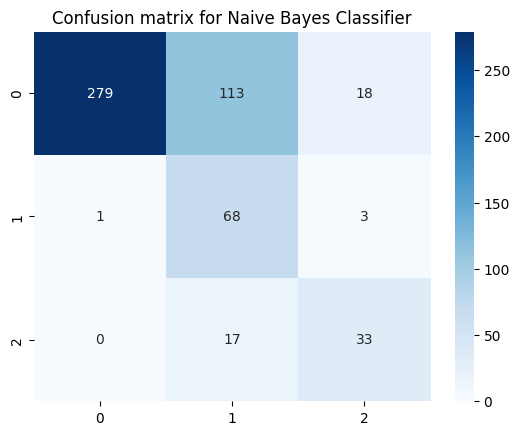

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(nb_cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Naive Bayes Classifier')
plt.show()

In [ ]:
print("Naive Bayes model evaluation metrics before parameter tuning:")
print("Accuracy:",acc_nb)
print("Precision:",prec_nb)
print("Recall:",rec_nb)
print("F1 score:",f1_nb)
print("ROC AUC score:",auc_nb)
print("MSE:",nb_mse)
print("RMSE:",nb_rmse)
print("MAE:",nb_mae)
print("AE:",nb_ae)
print("R2:",nb_r2)

Naive Bayes model evaluation metrics before parameter tuning:
Accuracy: 0.7142857142857143
Precision: 0.6503246753246753
Recall: 0.7616440831074978
F1 score: 0.6490049134976671
ROC AUC score: 0.8831630532971996
MSE: 0.38721804511278196
RMSE: 0.6222684670725185
MAE: 0.31954887218045114
AE: 170.0
R2: 0.04801945795691476


In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         1.0       1.00      0.68      0.81       410
         2.0       0.34      0.94      0.50        72
         3.0       0.61      0.66      0.63        50

    accuracy                           0.71       532
   macro avg       0.65      0.76      0.65       532
weighted avg       0.87      0.71      0.75       532



In [ ]:
y_train_pred=nb.predict(X_train)
y_test_pred=nb.predict(X_test)
train_error_nb=mean_squared_error(y_train, y_train_pred)
test_error_nb=mean_squared_error(y_test, y_test_pred)

In [ ]:
print("Training error for Naive Bayes Classifier:",train_error_nb)
print("Testing error for Naive Bayes Classifier:",test_error_nb)

Training error for Naive Bayes Classifier: 0.34065244667503136
Testing error for Naive Bayes Classifier: 0.38721804511278196


## Final Results

In [ ]:
models = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Naive Bayes']
performance = {'Accuracy': [acc_knn, acc_dt, acc_rf, acc_lr, acc_nb],
               'Precision': [prec_knn, prec_dt, prec_rf, prec_lr, prec_nb],
               'Recall': [rec_knn, rec_dt, rec_rf, rec_lr, rec_nb],
               'F1-Score': [f1_knn ,f1_dt, f1_rf ,f1_lr, f1_nb],
               'ROC AUC': [auc_knn, auc_dt, auc_rf, auc_lr, auc_nb],
               'MSE':[knn_mse,dt_mse,rf_mse,lr_mse,nb_mse],
               'RMSE':[knn_rmse,dt_rmse,rf_rmse,lr_rmse,nb_rmse],
               'MAE':[knn_mae,dt_mae,rf_mae,lr_mae,nb_mae],
               'AE':[knn_ae,dt_ae,rf_ae,lr_ae,nb_ae],
               'R2':[knn_r2,dt_r2,rf_r2,lr_r2,nb_r2]}

errors={'Training error':[train_error_knn,train_error_dt,train_error_rf,train_error_lr,train_error_nb],
        'Testing error':[test_error_knn,test_error_dt,test_error_rf,test_error_lr,test_error_nb]}
sum_tab=pd.DataFrame(performance,index=models)
error_tab=pd.DataFrame(errors,index=models)

In [ ]:
sum_tab

,Accuracy,Precision,Recall,F1-Score,ROC AUC,MSE,RMSE,MAE,AE,R2
KNN,0.902256,0.849419,0.770944,0.805335,0.938762,0.142857,0.377964,0.112782,60.0,0.648784
Decision Tree,0.928571,0.916410,0.834494,0.870563,0.935333,0.110902,0.333020,0.084586,45.0,0.727345
Random Forest,0.945489,0.926573,0.884309,0.904162,0.959854,0.060150,0.245256,0.056391,30.0,0.852120
Logistic Regression,0.887218,0.820707,0.758586,0.786379,0.936317,0.163534,0.404393,0.129699,69.0,0.597950
Naive Bayes,0.714286,0.650325,0.761644,0.649005,0.883163,0.387218,0.622268,0.319549,170.0,0.048019


In [ ]:
error_tab

,Training error,Testing error
KNN,0.043287,0.110902
Decision Tree,0.043287,0.110902
Random Forest,0.001255,0.060150
Logistic Regression,0.139272,0.163534
Naive Bayes,0.340652,0.387218


## AUC ROC Curves of the Model

In [ ]:
models=[knn,dt,rf,lr,nb]
n_classes=3
y_test_bin=label_binarize(y_test,classes=[1,2,3]) #converting Y test to binary form

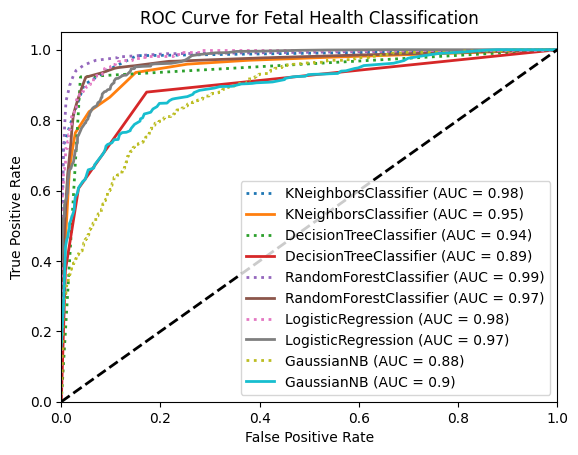

In [ ]:
for model in models:
    y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    plt.plot(fpr["micro"], tpr["micro"], label='{} (AUC = {})'.format(type(model).__name__, round(roc_auc["micro"], 2)), linestyle=':', linewidth=2)
    plt.plot(fpr["macro"], tpr["macro"], label='{} (AUC = {})'.format(type(model).__name__, round(roc_auc["macro"], 2)), linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fetal Health Classification')
plt.legend(loc="lower right")
plt.show()